# Face Recognition using CNN

 # Step1:
 
At the first, you should input the required libraries:

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input

import numpy as np
import pandas as pd
import tensorflow as tf
#tf.config.run_functions_eagerly(True)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
import np_utils
import itertools

# Step2:

* Load Dataset :

After loading the Dataset you have to normalize every image.

Note: an image is a Uint8 matrix of pixels and for calculation, you need to convert the format of the image to float or double

In [4]:
#load dataset
x_data = np.load("trainset/train_x.npy")
y_data = np.load("trainset/train_y.npy")


#normalize every image
x_data= np.array(x_data,dtype='float32')/255

#Creating a mapping for index and face names
facemapping = {
0:'E',
1:'G',
2:'hanseng',
3:'eugene',
4:'tanaaz',
5:'B',
6:'ivan',
7:'A',
8:'F',
9:'C',
10:'david',
11:'D',
12:'hiran'}
#train test split
x_train, x_test, y_train, y_test= train_test_split(
    x_data, y_data, test_size=.3, random_state=1234,)
# show the train and test Data format
print('x_train : {}'.format(x_train[:]))
print('y_train : {}'.format(y_train))
print('y_train shape: {}'.format(y_train.shape))
print('x_train shape: {}'.format(x_train.shape))

x_train : [[0.9372549  0.9254902  0.8666667  ... 0.95686275 0.95686275 0.9764706 ]
 [0.6313726  0.6        0.5764706  ... 0.8980392  0.8666667  0.8627451 ]
 [0.9882353  0.9882353  0.9843137  ... 0.9254902  0.9411765  0.9411765 ]
 ...
 [0.00784314 0.01960784 0.00392157 ... 0.85490197 0.8627451  0.8980392 ]
 [0.9843137  1.         0.99607843 ... 0.8901961  0.8901961  0.8862745 ]
 [0.9843137  0.9764706  0.9843137  ... 0.14509805 0.1764706  0.16470589]]
y_train : [ 8  1 11  3  5  8  8  9 11  9 12  8  5  3 12  3 12  2  6  6  1  5  6  4
  3  5  5 11  5  8  9  8  9 10 11  3  1 12  1  7  0 11  5  9  7  8  9  5
  9  3 10  2  6 12  6 10  0  7  4 12 12  7  2  2  6  0  5  8  0 11 11  0
  7  3  1  9 11  9  1  3 11  7  5  7  6  4  6  1  8  8  4  3  6 11  7  4
 11 10 10  5  7  9 11 11  1  0  6 11  4  7 11 11  1  2 12  9  7  3  0  8
  7  7  7  6 10  0  8  1  5  5 10  9  2  0 11 10  0  0 12  0  5  0  1  1
  5  1  5  2  8  1  0  6  9  5  4  9]
y_train shape: (156,)
x_train shape: (156, 8100)


# Step 3

Split DataSet : Validation data and Train 

Validation DataSet: this data set is used to minimize overfitting.If the accuracy over the training data set increases, but the accuracy over then validation data set stays the same or decreases, then you're overfitting your neural network and you should stop training.

 * Note: we usually use 30 percent of every dataset as the validation data but Here we only used 5 percent because the number of images in this dataset is very low. 



In [5]:
x_train, x_valid, y_train, y_valid= train_test_split(
    x_train, y_train, test_size=.05, random_state=1234,)

# Step 4

for using the CNN, we need to change The size of images ( The size of images must be the same)

In [18]:
im_rows=90
im_cols=90
im_shape=(im_rows, im_cols, 1)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print(x_train[0])
print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))

[[[0.98039216]
  [0.9882353 ]
  [0.96862745]
  ...
  [0.99215686]
  [0.99215686]
  [0.99215686]]

 [[0.9882353 ]
  [0.9843137 ]
  [0.972549  ]
  ...
  [0.99607843]
  [0.99607843]
  [0.99607843]]

 [[0.9843137 ]
  [0.972549  ]
  [0.99215686]
  ...
  [0.99607843]
  [1.        ]
  [1.        ]]

 ...

 [[0.11372549]
  [0.09411765]
  [0.13725491]
  ...
  [0.14509805]
  [0.15686275]
  [0.15686275]]

 [[0.14117648]
  [0.09411765]
  [0.10980392]
  ...
  [0.16078432]
  [0.14901961]
  [0.15294118]]

 [[0.14901961]
  [0.09803922]
  [0.11372549]
  ...
  [0.14901961]
  [0.13725491]
  [0.14117648]]]
x_train shape: (148, 90, 90, 1)
x_test shape: (67, 90, 90, 1)


# Step 5


Build CNN model:
 CNN have 3 main layer: 
 * 1-Convolotional layer 
 * 2- pooling layer  
 * 3- fully connected layer
 
 we could build a new architecture of CNN by changing the number and position of layers.
 

In [22]:

#filters= the depth of output image or kernels
output_num = 13

cnn_model= Sequential([
    Input(shape = im_shape),
    Conv2D(filters=32, kernel_size=7, activation='relu'),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=64, kernel_size=5, activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(output_num, activation='softmax')
])

cnn_model.compile(
    optimizer="adam",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Show the model's parameters.

In [23]:
cnn_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 84, 84, 32)     │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 42, 42, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 38, 38, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 19, 19, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 23104)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │     1,478,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 13)             │           429 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,534,093 (5.85 MB)

 Trainable params: 1,534,093 (5.85 MB)

 Non-trainable params: 0 (0.00 B)

# Step 6

Train the Model

* Note: You can change the number of epochs


In [24]:
history=cnn_model.fit(
    x_train, 
    y_train, 
    batch_size=128,
    epochs=100, 
    verbose=2,
    validation_data=(x_valid,y_valid),
)

Epoch 1/100
2/2 - 1s - 744ms/step - accuracy: 0.1081 - loss: 2.6732 - val_accuracy: 0.0000e+00 - val_loss: 2.7206
Epoch 2/100
2/2 - 0s - 144ms/step - accuracy: 0.2162 - loss: 2.4972 - val_accuracy: 0.0000e+00 - val_loss: 2.6146
Epoch 3/100
2/2 - 0s - 141ms/step - accuracy: 0.0946 - loss: 2.5239 - val_accuracy: 0.0000e+00 - val_loss: 2.6005
Epoch 4/100
2/2 - 0s - 145ms/step - accuracy: 0.1419 - loss: 2.4883 - val_accuracy: 0.0000e+00 - val_loss: 2.6489
Epoch 5/100
2/2 - 0s - 153ms/step - accuracy: 0.1892 - loss: 2.3786 - val_accuracy: 0.0000e+00 - val_loss: 2.7131
Epoch 6/100
2/2 - 0s - 150ms/step - accuracy: 0.2230 - loss: 2.3118 - val_accuracy: 0.0000e+00 - val_loss: 2.7753
Epoch 7/100
2/2 - 0s - 138ms/step - accuracy: 0.4459 - loss: 2.1310 - val_accuracy: 0.0000e+00 - val_loss: 2.7431
Epoch 8/100
2/2 - 0s - 134ms/step - accuracy: 0.4797 - loss: 1.9049 - val_accuracy: 0.0000e+00 - val_loss: 2.8828
Epoch 9/100
2/2 - 0s - 132ms/step - accuracy: 0.3243 - loss: 1.8511 - val_accuracy: 0.12

Evaluate the test data


In [25]:
scor = cnn_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)
cnn_model.save('models/cnn.keras')

print('test los {:.4f}'.format(scor[0]))
print('test acc {:.4f}'.format(scor[1]))

test los 0.4223
test acc 0.9104


# Step 7 

plot the result

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


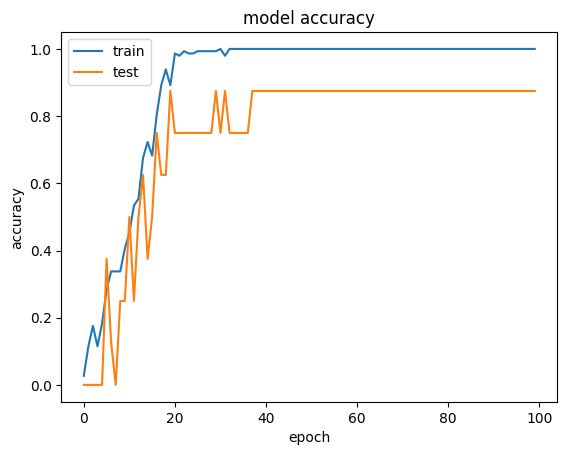

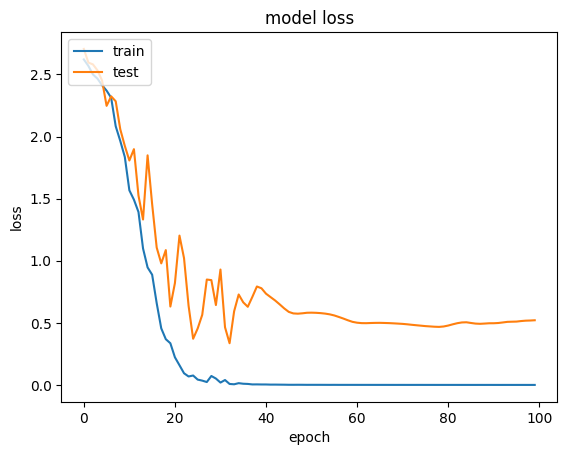

In [17]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()